Epoch 1/5
177/177 [==============================] - 103s 578ms/step - loss: 2.8687 - accuracy: 0.1747 - val_loss: 2.4555 - val_accuracy: 0.3477
Epoch 2/5
177/177 [==============================] - 99s 560ms/step - loss: 1.8162 - accuracy: 0.5300 - val_loss: 1.4672 - val_accuracy: 0.5929
Epoch 3/5
177/177 [==============================] - 100s 567ms/step - loss: 1.0999 - accuracy: 0.7005 - val_loss: 1.1895 - val_accuracy: 0.6583
Epoch 4/5
177/177 [==============================] - 106s 600ms/step - loss: 0.7134 - accuracy: 0.8160 - val_loss: 1.1045 - val_accuracy: 0.6834
Epoch 5/5
177/177 [==============================] - 96s 544ms/step - loss: 0.4569 - accuracy: 0.8947 - val_loss: 1.0938 - val_accuracy: 0.6831


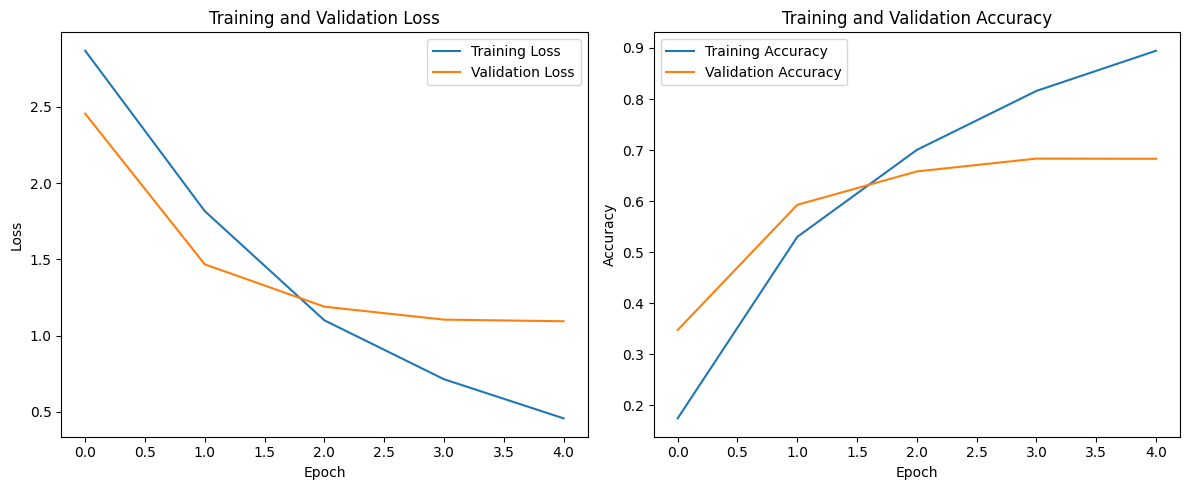

148/148 [==============================] - 11s 75ms/step - loss: 1.1220 - accuracy: 0.6677
Test Loss: 1.1220
Test Accuracy: 0.6677


In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)

# Tokenize and pad the text data
max_sequence_length = 1000  # Adjust as needed
tokenizer = Tokenizer(num_words=10000)  # You can adjust num_words as needed
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Convert target labels to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Create a CNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(20, activation='softmax'))  # 20 classes for 20 Newsgroups dataset

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture training history
history = model.fit(X_train_padded, y_train_onehot, epochs=5, batch_size=64, validation_split=0.2)

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_onehot)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")